___
> ℹ️ **NOTE:** This project is associated with the GitHub repository *FAI23_G08* and can be consulted through the following link: https://github.com/andre1araujo/FAI23_G08
___

# **Introduction**

This project was carried out by students of the Master of **Applied Artificial Intelligence**:
* David Rodrigues - https://github.com/dhabid **or** a21177@alunos.ipca.pt
* André Araújo - https://github.com/andre1araujo **or** a21185@alunos.ipca.pt

The work arises in the context of the Fundamentals of Artificial Intelligence (FAI) discipline of the Master of Applied Artificial Intelligence. As can be seen, the work aims to solidify some foundations of artificial intelligence, encouraging students to solve problems whose solution is based on algorithms of this topic. It appears as a follow-up to project 1, and this time the aim is to implement **machine learning** algorithms.

The work is then divided into two parts, one that addresses **supervised learning** methods (*supervised learning*) and another that addresses **unsupervised learning** methods (*unsupervised learning*). The **first topic** is the responsibility and development of **David Rodrigues**, while the **second part** is the exclusive responsibility of **André Araújo**.

Both parts and methods are based on existing databases (*datasets*), so the website used to obtain them was **[Kaggle](https://www.kaggle.com/datasets)** .

**IMPORTANT:** For this project it will be necessary to include a folder called `datasets` in the same location as the notebook. The Kaggle datasets should be included in this folder.

The structure of the work is as follows for both parts:

1. Dataset used

2. Required Libraries

3. Problem and resolution method

4. Problem resolution

5. Conclusion

----
# **Supervised Learning**

## Dataset

The Heart Attack Risk Prediction Dataset is a valuable resource to delve deeper into the dynamics of heart health and its predictive factors. Heart attacks, or myocardial infarctions, remain a significant global health problem, requiring a deeper understanding of their precursors and potential mitigating factors. This data set encompasses a diverse range of attributes, including age, cholesterol levels, blood pressure, smoking habits, exercise patterns, food preferences, among others, with the aim of elucidating the complex interaction of these variables in determining the probability of an heart attack.

The dataset used for this problem can be found at the following link:
https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

Next we have a table that presents a small excerpt from the dataset:

|Patient ID|Age|Sex|Blood Pressure|Heart Rate|Diabetes|Smoking|Obesity|Exercise(Hours Per Week)|Diet|Previous Heart Problems|...|Heart Attack Risk|
|-----|------|-----|-----|-----|-----|------|----- |-----|-----|-----|-----|-----|
|HQM9364|75|Female|141/85|101|0|0|1|14.74|Unhealthy|0|...|0|
|ESJ9954|62|Male|137/82|89|1|0|1|16.22|Unhealthy|0|...|1|
|ONA1218|72|Female|128/93|86|1|1|0|6.81|Average|0|...|1|
|UBE5339|18|Female|132/94|109|1|1|1|18.29|Average|1|...|1|

⚠️ The **heart_attack_prediction_dataset.csv** file must be placed in the **datasets** folder in the same location on the notebook.

----
# Libraries

For this algorithm we will need some libraries such as the **pandas** library to work with data manipulation and analysis and the **numpy** library to manipulate matrices.

The installation of these libraries must be previously carried out in the usage environment through **PIP** as follows:
* `pip install pandas`
* `pip install numpy`

More information about the libraries can be found at the following links:
* pandas - https://pandas.pydata.org/
* numpy - https://numpy.org/

In [1]:
import pandas as pd
import numpy as np

Next, it is necessary to call several **sklearn** libraries for *machine learning* algorithms. In this case, **StandardScaler** will be called to normalize the data.

To include the libraries, you will need to previously install sklearn:
* `pip install -U scikit-learn`

Next, several **sklearn** libraries are required for implementing machine learning algorithms and evaluating models. The libraries called are **StandardScaler** for data normalization, **train_test_split** for dividing training and testing sets, some evaluation metrics such as **confusion_matrix** and **accuracy_score**, and finally algorithms classification systems such as **KNeighborsClassifier**, **Decision Tree** and **Random Forest**.

You can find more information about sklearn and associated libraries at the following links:
* sklearn - https://scikit-learn.org/stable/
* sklearn/StandardScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* sklearn/train_test_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* sklearn/Metrics - https://scikit-learn.org/stable/modules/model_evaluation.html
* sklearn/KNeighborsClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* sklearn/DecisionTree - https://scikit-learn.org/stable/modules/tree.html
* sklearn/RandomForest - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Finally, the graphical visualization libraries and another that allows oversampling are called.

The inclusion of these libraries requires the prior installation of the following packages:

* `pip install matplotlib`

* `pip install seaborn`

* `pip install imblearn`

You can find more information about the libraries at the following links:

* matpotlib/plot - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* seaborn - https://seaborn.pydata.org/
* imblearn - https://imbalanced-learn.org/stable/

In [3]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

----
## Automatic classification process

The purpose of this process is to predict whether a person is at risk of having a heart attack or not. To do this we will use automatic classification.<br>
Machine classification is a process in which a machine learning model is trained to categorize or label items based on their characteristics.<br>
The problem will be divided into the following tasks:

1. Data processing and preparation.

2. Data visualization:

3. Data preprocessing:

4. Select the set of characteristics and the target variable.

5. Data splitting.

6. Select a classification algorithm.

7. Train the model.

8. Evaluate the model.

### Classification algorithms used

For this problem we will apply three different classification methods, namely K Nearest Neighbors, Decision Tree and Random Forest. Each of these will be explained below.<br>
* **K Nearest Neighbor:**<br>
The K-Nearest Neighbors (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It is based on the idea that similar data points tend to have similar labels or values.<br>
During the training phase, the KNN algorithm stores the entire training data set as a reference. When making predictions, it calculates the distance between the input data point and all training examples, using a chosen distance metric such as Euclidean distance.<br>
Then, the algorithm identifies the K closest neighbors of the input data point based on their distances. In the case of classification, the algorithm assigns the label of the most common class among the K neighbors as the predicted label for the input data point. In the case of regression, it calculates the average or weighted average of the target values ​​of the K neighbors to predict the value of the input data point.

* **Decision Tree:**<br>
A Decision Tree is a tree structure similar to a flowchart in which an internal node represents a characteristic (or attribute), the branch represents a decision rule and each leaf represents the result.<br>
The top node of a decision tree is known as the root node. Learns to divide based on attribute value. The tree is divided recursively, which is called recursive division.

* **Random Forest:**<br>
In a Random Forest classification, several decision trees are created using different random subsets of data and features. Each decision tree is like an expert, providing their opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree and then calculating the most popular result.

# Data processing

We start by reading the dataset using the 'read_csv' function through *pandas*.<br>
Then we can also visualize the first rows of the dataset.

In [11]:
heart_attack_file_path = './heart_attack_prediction_dataset.csv'
heart_attack_data = pd.read_csv(heart_attack_file_path)
heart_attack_data.head()

,Patient_ID,Age,Sex,Cholesterol,Blood_Pressure,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,...,Sedentary_Hours_Per_Day,Income,BMI,Triglycerides,Physical Activity_Days _Per_Week,Sleep_Hours_Per_Day,Country,Continent,Hemisphere,Heart_Attack_Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


As the algorithm requires numeric values ​​we will have to replace the categorical value in the 'Diet' column with a numeric representation.<br>
For this case we decided to represent '0' as 'Unhealthy', '1' as 'Average' and '2' as 'Healthy'.<br>
We did the same for the 'Sex' column. We decided to represent '1' as 'Male' and '0' as 'Female'.

In [12]:
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
heart_attack_data['Diet'] = heart_attack_data['Diet'].map(ordinal_map)

ordinal_map_sex = {'Male':1, 'Female':0}
heart_attack_data['Sex'] = heart_attack_data['Sex'].map(ordinal_map_sex)

As the 'Blood Pressure' column has two numbers we have to separate these two into 'BP_Systolic' and 'BP_Diastolic'.<br>
In other words, in the 'Blood Pressure' column there were values ​​like 120/80. What we do here is separate these values ​​with 120 'BP_Systolic' and 80 'BP_Diastolic'.<br>
We also removed the 'Country', 'Continent' and 'Hemisphere' columns since we think they have no influence on the result.

In [13]:
#str = 180/120 = ["180", "120"]
heart_attack_data[['BP_Systolic', 'BP_Diastolic']] = heart_attack_data['Blood_Pressure'].str.split('/', expand=True)

# Convert the columns to numeric
heart_attack_data['BP_Systolic'] = pd.to_numeric(heart_attack_data['BP_Systolic'])
heart_attack_data['BP_Diastolic'] = pd.to_numeric(heart_attack_data['BP_Diastolic'])

heart_attack_data = heart_attack_data.drop(("Blood_Pressure"), axis = 1)

heart_attack_data = heart_attack_data.drop(columns=['Country', 'Continent','Hemisphere'])

In [14]:
# Checking Datatypes

heart_attack_data.dtypes

Patient_ID                           object
Age                                   int64
Sex                                   int64
Cholesterol                           int64
Heart_Rate                            int64
Diabetes                              int64
Family_History                        int64
Smoking                               int64
Obesity                               int64
Alcohol_Consumption                   int64
Exercise_Hours_Per_Week             float64
Diet                                  int64
Previous_Heart_Problems               int64
Medication_Use                        int64
Stress_Level                          int64
Sedentary_Hours_Per_Day             float64
Income                                int64
BMI                                 float64
Triglycerides                         int64
Physical Activity_Days _Per_Week      int64
Sleep_Hours_Per_Day                   int64
Heart_Attack_Risk                     int64
BP_Systolic                     


To avoid having rows in the dataset without any value, we added the following line of code to check if there is any column without a value, and we check that it does not exist.

In [15]:
# Detect Columns Containing Null Values
heart_attack_data.isna().sum()

Patient_ID                          0
Age                                 0
Sex                                 0
Cholesterol                         0
Heart_Rate                          0
Diabetes                            0
Family_History                      0
Smoking                             0
Obesity                             0
Alcohol_Consumption                 0
Exercise_Hours_Per_Week             0
Diet                                0
Previous_Heart_Problems             0
Medication_Use                      0
Stress_Level                        0
Sedentary_Hours_Per_Day             0
Income                              0
BMI                                 0
Triglycerides                       0
Physical Activity_Days _Per_Week    0
Sleep_Hours_Per_Day                 0
Heart_Attack_Risk                   0
BP_Systolic                         0
BP_Diastolic                        0
dtype: int64

# Select the set of characteristics and the target variable

Next we have to choose 'X', which is a set of features that are selected from the 'heart_attack_data' dataset. These characteristics include information related to age, cholesterol, heart rate, presence of diabetes, etc.<br>
We also chose 'y', which is the target variable that indicates whether a person is at risk of having a heart attack or not. The 'Heart_Attack_Risk' column from the 'heart_attack_data' dataset is used as the output variable for the prediction model. The values ​​in this column are the labels that the model will attempt to predict.

In [17]:
# Choose target and features

X = heart_attack_data[['Sex', 'Age', 'Cholesterol', 'Heart_Rate','Diabetes', 'Family_History','BP_Systolic','BP_Diastolic',
                        'Smoking', 'Obesity','Alcohol_Consumption', 'Diet', 'Exercise_Hours_Per_Week',
                        'Previous_Heart_Problems', 'Medication_Use', 'Triglycerides', 'Sleep_Hours_Per_Day']]
        
y=heart_attack_data['Heart_Attack_Risk'].values

# K Neighbors Classifier

We start by dividing the dataset into training and testing sets. X_train, X_test, y_train, and y_test are the variables that store these sets.<br>
The training set is used to train the model, while the test set is reserved for evaluating the model's performance on unseen data.<br>
The 'random_state' parameter is used to control the randomness in data division.<br>
The 'test_size' parameter controls the proportion of the dataset that will be reserved for the test set.
In this case, test_size=0.2 means that 20% of the data will be used as the test set, while 80% will be used as the training set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1,test_size=0.2)

Then we use StandardScaler to normalize the characteristics.<br>
Distance-based algorithms such as K-NN can be sensitive to the scale of features. Normalizing features ensures that they are all on the same scale, preventing features with larger values ​​from dominating the model's contribution.

In [19]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Then we initialize the classifier.<br>
For 'n_neighbor' we tested with 4 values ​​(3, 5, 7 and 12) and later we will choose the best one:

In [20]:
classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_5 = KNeighborsClassifier(n_neighbors=5)
classifier_7 = KNeighborsClassifier(n_neighbors=7)
classifier_12 = KNeighborsClassifier(n_neighbors=12)

Then we train the K-NN model with the training sets (X_train and y_train).<br>
Model training involves learning patterns in the training data, allowing the model to make predictions about unseen data.

In [21]:
# Fit Model
classifier_3.fit(X_train, y_train)
classifier_5.fit(X_train, y_train)
classifier_7.fit(X_train, y_train)
classifier_12.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)


We later made predictions on the test set using the trained model.<br>
The predictions are compared to the true classes in the test set to evaluate the model's performance.

In [22]:
# Predict the test set results
y_pred_3 = classifier_3.predict(X_test)
y_pred_5 = classifier_5.predict(X_test)
y_pred_7 = classifier_7.predict(X_test)
y_pred_12 = classifier_12.predict(X_test)

Finally, we use some metrics to evaluate the model’s performance.<br>
The confusion_matrix calculates the confusion matrix to evaluate the model's performance.<br>
The accuracy_score calculates the overall accuracy of the model.<br>

[[807 335]
 [448 163]]
0.5533371363377068
[[847 295]
 [469 142]]
0.5641756988020536
[[898 244]
 [482 129]]
0.5858528237307473
[[1041  101]
 [ 565   46]]
0.6200798630918426


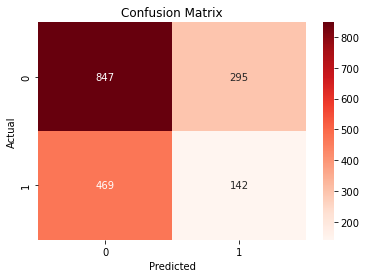

In [23]:
# Evaluate Model

cm_KNN = confusion_matrix(y_test, y_pred_3)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_3))

cm_KNN = confusion_matrix(y_test, y_pred_5)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_5))

cm_KNN = confusion_matrix(y_test, y_pred_7)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_7))

cm_KNN = confusion_matrix(y_test, y_pred_12)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_12))

cm_KNN = confusion_matrix(y_test, y_pred_5)
acc_KNN = accuracy_score(y_test, y_pred_5)
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We chose to choose the model with 'n_neighbors'=5 for its overall model accuracy and for presenting a better confusion matrix.
With these results we have:<br>
* True Positives (142): These are individuals correctly predicted to be at risk for heart attack.
* True Negatives (847): These are individuals correctly predicted to not be at risk for a heart attack.
* False Positives (295): These are individuals incorrectly predicted to be at risk for heart attack.
* False Negatives (469): These are individuals incorrectly predicted to not be at risk for a heart attack.
* Accuracy of 0.564 indicates that when the model predicts that an individual is at risk of having a heart attack, it is correct about 56.4% of the time.

# Decision Tree

We start by dividing the dataset into training and testing sets. X_train, X_test, y_train, and y_test are the variables that store these sets.<br>
The training set is used to train the model, while the test set is reserved for evaluating the model's performance on unseen data.<br>
The 'random_state' parameter is used to control the randomness in data division.<br>
The 'test_size' parameter controls the proportion of the dataset that will be reserved for the test set.
In this case, test_size=0.3 means that 30% of the data will be used as the test set, while 70% will be used as the training set.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 0)

Then we use StandardScaler to normalize the characteristics.<br>

In [25]:
# Standardize the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Then we try to find the best parameters to use in our model. To do this, we use the GridSearchCV class from scikit-learn to find the best parameters. <br>
The parameters that can be changed are:
* 'max_depth': The maximum depth of the decision tree.
* 'min_samples_leaf': The minimum number of samples required to be in a leaf.
* 'criterion': The function used to measure the quality of a division.

In [26]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None,5, 7, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini','entropy']
}

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}


We then apply the best parameters to our decision tree.

In [27]:
best_params = grid_search.best_params_

clf = DecisionTreeClassifier(**best_params)

Then we train the model with the training sets (X_train and y_train).<br>
Model training involves learning patterns in the training data, allowing the model to make predictions about unseen data.

In [28]:
# Train the model on the training set
clf_model = clf.fit(X_train, y_train)

We later made predictions on the test set using the trained model.<br>
The predictions are compared to the true classes in the test set to evaluate the model's performance.

In [29]:
# Predict the test set results
y_pred = clf_model.predict(X_test)

Finally, we use some metrics to evaluate the model’s performance.<br>

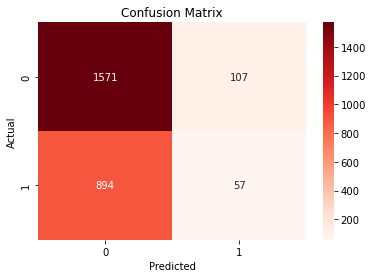

[[1571  107]
 [ 894   57]]
0.6192468619246861


In [30]:
# Evaluate Model

cm_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm_dt)
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)

With these results we have:<br>
* True Positives (57): These are individuals correctly predicted to be at risk for heart attack.
* True Negatives (1571): These are individuals correctly predicted to not be at risk for a heart attack.
* False Positives (107): These are individuals incorrectly predicted to be at risk for heart attack.
* False Negatives (894): These are individuals incorrectly predicted to not be at risk for a heart attack.
* Accuracy of 0.619 indicates that when the model predicts that an individual is at risk of having a heart attack, it is correct about 61.9% of the time.

# Random Forest

Finally we used another classification algorithm, Random Forest, but this time with oversample.<br>
Oversample is an approach used in machine learning to solve the imbalanced dataset problem, where one class has significantly fewer instances than the other. In classification problems, having unbalanced classes can lead to biased models that may perform poorly on the minority class, since the model tends to be more influenced by the majority class.<br>
To do this, we use SMOTE to oversample the minority class in the dataset, thus creating synthetic samples to balance the distribution of the classes.

In [31]:
smote = SMOTE(random_state = 0)
X_resample, y_resample = smote.fit_resample(X, y)


We use scikit-learn's StandardScaler to scale the features of the resampled dataset.

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

The rescaled dataset is split into training and test sets using train_test_split.<br>
The division is 70% for training and 30% for testing.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resample, test_size=0.3, random_state=0)

We use scikit-learn's RandomForestClassifier to train a Random Forest model on the training data.

In [34]:
model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

Predict the target (y_pred) on the test set using the trained Random Forest model.

In [35]:
y_pred = model.predict(X_test)

Finally, it calculates the confusion matrix to evaluate the model.

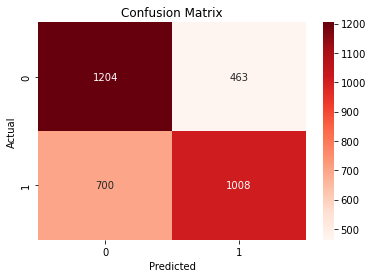

0.6554074074074074


In [36]:
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

With these results we have:<br>
* True Positives (1003): These are individuals correctly predicted to be at risk for heart attack.
* True Negatives (1174): These are individuals correctly predicted to not be at risk for a heart attack.
* False Positives (493): These are individuals incorrectly predicted to be at risk for heart attack.
* False Negatives (705): These are individuals incorrectly predicted to not be at risk for a heart attack.
* Accuracy of 0.645 indicates that when the model predicts that an individual is at risk of having a heart attack, it is correct about 64.5% of the time.

----
# Comparison between models

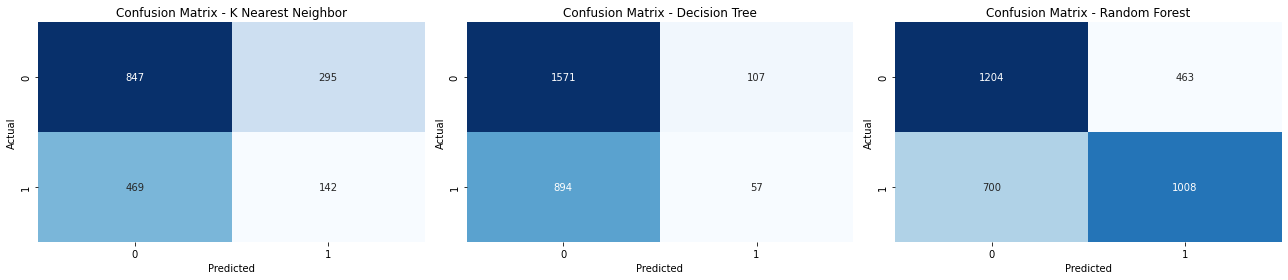

In [37]:
def plot_confusion_matrix(matrix, model_name, ax):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

plot_confusion_matrix(cm_KNN, 'K Nearest Neighbor', axes[0])
plot_confusion_matrix(cm_dt, 'Decision Tree', axes[1])
plot_confusion_matrix(cm_rf, 'Random Forest', axes[2])

plt.tight_layout()
plt.show()

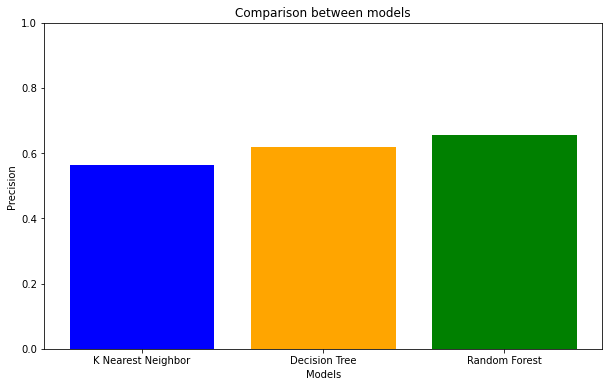

In [38]:
precisions = [acc_KNN, acc_dt, acc_rf]
model_names = ['K Nearest Neighbor', 'Decision Tree', 'Random Forest']

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison between models')
plt.ylim(0, 1)
plt.show()

As we can see from the results above, we can see that we obtained a better result with the Random Forest model.<br>
This may be because Random Forest is an ensemble model that combines several decision trees to make predictions. This model aggregation method can provide greater stability and overall performance compared to a single decision tree.<br>
It may also be due to the fact that in this model we oversampled, which is an approach used in machine learning to solve the problem of unbalanced dataset.<br>

Random Forest often outperforms Decision Trees and KNN in terms of robustness and generalizability.<br>
The choice of model depends on the specific context, the nature of the data, and the requirements of the problem.
Experimenting with different algorithms and tuning their hyperparameters can help determine which model is best suited for the task at hand.<br>

----
## Conclusion of Supervised Learning

To complete the supervised learning analysis, we explored three distinct models - K Nearest Neighbor (KNN), Decision Tree and Random Forest - with the aim of predicting whether or not a person is at risk of having a heart attack. Each model has unique characteristics that influence its performance on the task in question.

KNN, although a simple and intuitive model, can be sensitive to the scale of the data and the presence of irrelevant features. Its performance may vary depending on the appropriate configuration of hyperparameters, such as the number of neighbors.

The Decision Tree is a more interpretable approach, allowing you to visualize decisions made by the model. However, without adequate constraints, decision trees can become prone to overfitting, resulting in overfitting to the training data.

Random Forest, in turn, stood out as a robust choice, taking advantage of the strength of ensemble learning. By building multiple decision trees and combining their results, Random Forest tends to generalize well, reducing the likelihood of overfitting.

The study of these models deepened the understanding of supervised learning and its applications.

# **Introduction**

This project was carried out by students of the **Master of Applied Artificial Intelligence**:
* David Rodrigues - 21177
* André Araújo - 21185

The work arises in the context of the Fundamentals of Artificial Intelligence (FAI) discipline of the Master of Applied Artificial Intelligence. As can be seen, the work aims to solidify some foundations of artificial intelligence, encouraging students to solve problems whose solution is based on algorithms of this topic. It appears as a follow-up to project 1, and this time the aim is to implement **machine learning** algorithms.

The work is then divided into two parts, one that addresses **supervised learning** methods (*supervised learning*) and another that addresses **unsupervised learning** methods (*unsupervised learning*). The **first topic** is the responsibility and development of **David Rodrigues**, while the **second part** is the exclusive responsibility of **André Araújo**.

Both parts and methods are based on existing databases (*datasets*), so the website used to obtain them was **[Kaggle](https://www.kaggle.com/datasets)** .

**IMPORTANT:** For this project it will be necessary to include a folder called `datasets` in the same location as the notebook. The Kaggle datasets should be included in this folder.

The structure of the work is as follows for both parts:

1. Dataset used

2. Required Libraries

3. Problem and resolution method

4. Problem resolution

5. Conclusion

---
# **Unsupervised Learning**




## Dataset

Dataset corresponds to a set of **data related to a theme**. A simpler way to understand this is to think of a simple **table** in which each row corresponds to a transaction and the columns represent attributes of that transaction. An example will be discussed below to understand the concept in a more practical way.

For the subject of ***unsupervized learning***, a car market dataset obtained in Belarus in 2019 by Kirill Lepchenkov was chosen. This dataset can be consulted at the following link: https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog

Each row in the table corresponds to a transaction, that is, in this case, an advertisement for the sale of a particular car, and the columns contain various information about the product. The following table presents a small representative excerpt from the dataset for better understanding:

| Brand         |  Model  | Transmission |  color    |  mileage       | year | fuel         | capacity    |  chassi |
|---------------|---------|--------------|-----------|----------------|------|--------------|-------------|---------|
| Mercedes-Benz |  190    |   manual     |  white    |    300.000     | 1985 |    diesel    |  2.0        |  sedan  |
| Mercedes-Benz |  S500   |  automatic   |  gray     |    219.000     | 2011 |   gasoline   |  4.7        |  sedan  |
| Mercedes-Benz | S63 AMG |  automatic   |    blue   |    76.700      | 2008 |   gasoline   |  6.2        |  sedan  |
| Porsche       |   911   |   manual     |    blue   |    197.000     | 2004 |   gasoline   |  3.6        |  sedan  |
| Ford          | Transit |   manual     |  white    |    486.000     | 1997 |    diesel    |  2.5        |   van   |


As you can see, each car has **numerical and qualitative attributes**. This will be useful to address different unsupervised learning methods.


⚠️ The **cars.csv** file must be placed in the **datasets** folder in the same location on the notebook.

___
## Libraries

Obviously, several libraries will be important to apply the machine learning domain. To begin with, it will be important to use the **pandas** library to work with data manipulation and analysis (data structures associated with the dataset) and the **numpy** library for numerical computation of matrices. These two libraries are an important basis for the work as everything is based on data and its computation.

The installation of these libraries must be previously carried out in the usage environment through **PIP** as follows:
* `pip install pandas`
* `pip install numpy`

More information about the libraries can be found at the following links:
* pandas - https://pandas.pydata.org/
* numpy - https://numpy.org/

In [ ]:
import pandas as pd
import numpy as np

Next, it is necessary to call several **sklearn** libraries for *machine learning* algorithms. In this case, **StandardScaler** will be called for data normalization and **KMeans** for implementing the *K-Means* algorithm. For association rules, another specific library will be discussed.

To include the libraries, you will need to previously install sklearn:
* `pip install -U scikit-learn`

You can find more information about sklearn and associated libraries at the following links:
* sklearn - https://scikit-learn.org/stable/
* sklearn/StandardScaler- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* sklearn/KMeans - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Lastly, the graphical visualization libraries are called. One of them allows three-dimensional visualization while the others present two-dimensional figures.

The inclusion of these libraries requires the prior installation of the following packages:
* `pip install mpl-toolkits.clifford`
* `pip install matplotlib`
* `pip install seaborn`

You can find more information about the libraries at the following links:
* matpotlib/mplot3d - https://matplotlib.org/stable/api/toolkits/mplot3d.html
* matpotlib/plot - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* seborn - https://seaborn.pydata.org/

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns

___
## Unsupervised Learning - Problem 1

The first unsupervised learning problem involves **organizing the car market into groups**. That is, according to some key characteristics of each car for sale on the market, the aim is to **organize groups that constitute a better or worse purchase opportunity**. This will help the user to choose a car taking into account that certain groups are not so favorable, thus guaranteeing a **good deal**.

To achieve this objective, the **K-Means** clustering algorithm will be used. This algorithm therefore does what it is intended to do, and divides a set of data into groups according to their similarity.

The way K-Means works is simple. We start by defining a value k that corresponds to the number of clusters (groups) that the data will have. There are methods that help to obtain a suitable k value for the data and will be discussed later. After defining the number of groups, there will be k centers (seeds) and these will be "released" randomly into the data set. The data closest to each of them will be associated with the centers and then the center will be repositioned according to the midpoint of this data. This is a quick and simple explanation of K-Means, but you can always consult more detailed information, for example, on [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering) or consult this small [practical example](https://www.datacamp.com/tutorial/k-means-clustering-python).

**The problem will then be divided into the following phases:**

1. Data processing, selection and preparation

2. Data visualization

3. Data normalization

4. Search for the best number of clusters

5. Clustering with K-Means

6. Visualization of clusters

7. Integration of clusters into the dataset

8. Three-dimensional visualization of clusters

___
### Choice, processing and preparation of data

An important aspect at this stage is the choice of data to be used for the algorithm. It is necessary to understand that only numerical attributes will be accepted and therefore a wide range of them can be discarded. But beyond this restriction, it is necessary to choose the data relevant to the problem. In this context, some of the most important aspects to consider when buying a car are, obviously, the mileage, the year of the car and the price. The relationship between this data should allow us to obtain a business opportunity relationship in the context of the car market.

Using *pandas*, the first thing that will be done is to obtain the cars dataset, located in the same directory in a "datasets" folder. The "read_csv" function therefore allows to obtain data from the cars dataset called "cars.csv" and also specifies the columns of the dataset that are wanted to obtain through "usecols". This data will be stored in a structure called a "data frame".

Another more subtle but important part is also the removal of lines/transactions whose data is incomplete. It is not possible to work with cars if at least one of the variables relevant to the algorithm is unknown. In this way, through the "dropna" function it is possible to carry out this filtering and ensure that there are no errors in the data.

Finally, it is possible to briefly visualize the data structure created using the pandas "head" function.

In [41]:
# Load the dataset
df = pd.read_csv('cars.csv', usecols=['odometer_value', 'year_produced', 'price_usd'])

# Remove rows with NaN in any column
df = df.dropna().copy()

# Print the first rows of the data frame
df.head()

,odometer_value,year_produced,price_usd
0,190000,2010,10900.00
1,290000,2002,5000.00
2,402000,2001,2800.00
3,10000,1999,9999.00
4,280000,2001,2134.11


___
### Data visualization

The graph corresponding to the chosen data structure will now be represented. Here it will be possible to view the relationship between mileage and the year of the car and the price. It can be seen that, as expected, the price is higher in the area where the car is newer and has fewer kilometers.

<AxesSubplot:xlabel='year_produced', ylabel='odometer_value'>

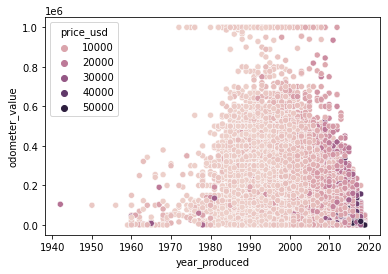

In [42]:
sns.scatterplot(data = df, x = 'year_produced', y = 'odometer_value', hue = 'price_usd')

___
### Data normalization

It is also very important to keep the different values of the structure's attributes on the same scale to facilitate data computation. To do this, normalization is performed, which places all values centered around the value 0 with standard deviation 1. There are other normalizations that place all data, for example, between 0 and 1, but in this case will be used StandardScaler for the normalization of the car data frame.

At the end it is possible to briefly visualize the transformation of the data.

In [43]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(df[['odometer_value', 'year_produced', 'price_usd']])
df_normalized = scaler.transform(df[['odometer_value', 'year_produced', 'price_usd']])
print(df_normalized[:5])

[[-0.43260362  0.87485665  0.66272301]
 [ 0.30230894 -0.11700687 -0.25512656]
 [ 1.125411   -0.24098981 -0.59737555]
 [-1.75544621 -0.48895569  0.52255649]
 [ 0.22881768 -0.24098981 -0.70096654]]


___
### Search for the best number of clusters with the Elbow method

The application part of the K-Means method to obtain groups of vehicles will now begin. The first step is to define the **value of k, which corresponds to the number of groups/clusters** that the data will have. To do this, the **Elbow method** will be used, which will generate a graph in the form of a **decreasing hyperbola**. In this method, the value of k is chosen based on graph analysis. As the name of the method indicates, **the best k will be the number on the x-axis associated with the area where the angle of the hyperbola is greatest** (as if it were at the elbow of an arm).

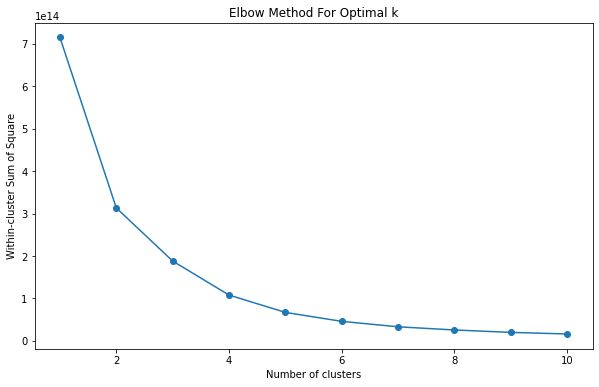

In [45]:
# Calculate the within-cluster sum of square across different cluster counts
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

As can be seen, the area of the graph that may correspond to the "elbow", although subjective, could be the value 3. Therefore, **k = 3**, therefore there are 3 groups in the data set.

It is worth mentioning that it is okay to experiment with different values of K based on the "elbow". This was done in this case and the conclusion reached is that it would make more sense to use 3 clusters due to the fact that a greater number of groups significantly increased the complexity of the situation.

___
### Clustering with K-Means

Now, the K-Means algorithm will be applied to the data set, knowing that k will be equal to 3. The sklearn functions were used to execute this algorithm, and a random initial state equal to 0 was also defined, which means that every time you run this code, the results will always be the same. However, it will be interesting to vary this value to any integer to obtain slightly different results.

In the end, the clusters are adjusted in number so that instead of starting at 0, they start at 1 in order to be more readable in a way.

In [47]:
# Elbow is at three clusters           
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(df_normalized)

# Adjusting clusters
adj_clusters = [x + 1 for x in clusters]

___
### Cluster Visualization

K-Means was run and the results were stored in memory. It now remains to visualize the clustering result to get an idea of the similarity between the groups.
**pyplot** from **matpotlib** was used for visualization.

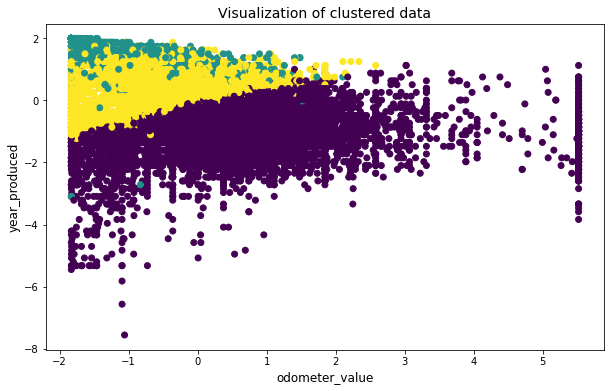

In [48]:
# Choose two dimensions to plot (e.g., odometer_value and year_produced)
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized[:,0], df_normalized[:,1], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('odometer_value', fontsize=12)
plt.ylabel('year_produced', fontsize=12)
plt.show()

From the graph it can be seen firstly that the normalized data values were used, therefore it is not possible to establish a specific link with years and mileage. However, it is possible to see that in general three groups were obtained that appear sequentially almost horizontally along the vertical axis.

It can be interpreted that a group was defined that covers older cars and cars with many kilometers. Another group includes relatively recent cars but without excessive mileage and the last group generally represents the most recent cars with fewer kilometers. We will further confirm these conclusions with statistical data.

These clusters allow the user to have a better idea of the purchase to be made according to their needs. Initially, a buyer usually prefers a relatively recent car without many kilometers, so they can narrow their search further in the last two clusters (blue and purple).

___
### Cluster analysis

We will analyze in more detail what the division of groups made by k-means represents. Important characteristics have already been analyzed in the previous graph and, therefore, we will now investigate further what result was obtained for each of the attributes.

* Firstly, to observe each cluster in terms of prices, we will use the boxplot:

     count          mean          std     min      25%      50%      75%  \
1  19031.0   2700.374016  1972.877713     1.0   1200.0   2250.0   3700.0   
2   4877.0  19425.473393  7563.155276  9000.0  14400.0  17000.0  22000.0   
3  14623.0   7502.965998  3045.520429     1.0   5300.0   7400.0   9500.0   

       max  
1  30000.0  
2  50000.0  
3  18500.0  


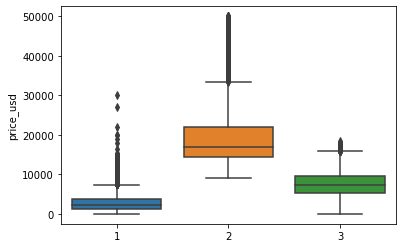

In [49]:
sns.boxplot(x = adj_clusters, y = df['price_usd'])
summary_stats = df.groupby(adj_clusters)['price_usd'].describe()
print(summary_stats)

As can be seen from the graph and adjacent statistics, the 1st cluster appears to contain the cars with the lowest price (between 5000 and 9000 USD), and on average a car in this group will cost around 2634.94 USD.

As for the 2nd cluster, prices vary between a minimum of 7587.97 USD and 50000 USD, with the high standard deviation indicating that there is a wide range of prices in this group. On average, a car from this group costs 18382.62 USD.

The 3rd cluster is the one with the lowest prices, ranging from 1200 to 3600 USD. The standard deviation indicates that in this group there is not such a sudden price variation. On average, a car from this group costs 2634.94 USD.

* Next, we will evaluate the dispersion of car mileage between each cluster:

     count           mean            std  min       25%       50%       75%  \
1  19031.0  329176.702118  129832.360444  1.0  265000.0  320000.0  380000.0   
2   4877.0  107462.287882   74126.156683  0.0   50000.0  104000.0  157000.0   
3  14623.0  191502.973945   81641.371817  0.0  140000.0  193000.0  247000.0   

         max  
1  1000000.0  
2   535000.0  
3   600000.0  


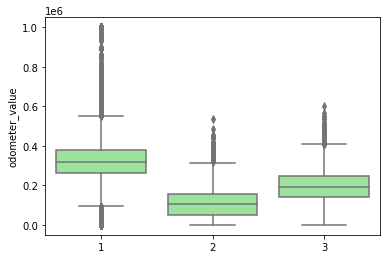

In [50]:
sns.boxplot(x = adj_clusters, y = df['odometer_value'],color='lightgreen')
summary_stats = df.groupby(adj_clusters)['odometer_value'].describe()
print(summary_stats)

As for mileage, cars in cluster 1 have an average of 198,271 km, those in cluster 2 109,480 km and those in the 3rd cluster 332,031 km. Once again, the standard deviations of the 3rd group indicate a wider distribution of mileage in these cars. Furthermore, it is possible to see that there are more outliars in this group, so it can be concluded that it is the group that "embraces" all those who do not fit into any of the groups so well.

* Finally, the year of the cars is evaluated using the extreme and quartile diagram:

     count         mean       std     min     25%     50%     75%     max
1  19031.0  1996.592927  5.400373  1942.0  1994.0  1998.0  2000.0  2012.0
2   4877.0  2014.022760  3.186971  1978.0  2012.0  2014.0  2016.0  2019.0
3  14623.0  2007.513916  3.970112  1986.0  2005.0  2008.0  2010.0  2019.0


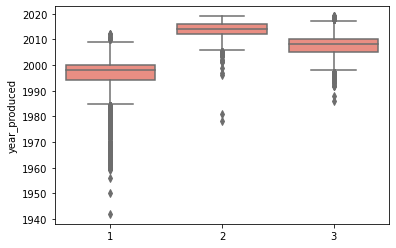

In [51]:
sns.boxplot(x = adj_clusters, y = df['year_produced'],color='salmon')
summary_stats = df.groupby(adj_clusters)['year_produced'].describe()
print(summary_stats)

The first group brings together cars from 1986 to 2019, with an average of 207.

The 2nd cluster has cars from 1978 to 2019, apparently covering a few more years than the 1st. However, it is possible to observe that these older cars are considered outliers in the graph and that, in addition, on average these cars are from 2014.

Finally, the 3rd cluster contains cars from 1942 to 2012, concluding that it is the group of old cars. On average, a car in this group is from 1996 and, given the standard deviation, this is the group with the broadest data.

Therefore, with all the data analyzed, we were able to conclude that there is a group (Cluster 3) that includes older cars, with more kilometers and cheaper, another group (cluster 2) that has more expensive cars, with fewer kilometers and more recent and a final group (cluster 1) that includes cars that are in the middle. In other words, cluster 1 groups cars with prices that are neither very high nor very low. In terms of mileage, this generally covers cars without many kilometers but also without a few and in terms of the year, these cars are relatively recent.

___
### Cluster integration in the Dataset

To provide the new cluster data to the user, you need to add it to the dataset. As such, a new column was added to the dataframe, which indicates the index associated with each cluster.

It is possible to see from the representation of the data that the system assigned the following numbers to the clusters:

* **Cluster 1** - In general, it corresponds to relatively recent cars **[Normal]**
* **Cluster 2** - In general, it corresponds to the group of recent cars with few kilometers **[Recent]**
* **Cluster 3** - In general, it corresponds to older cars with more kilometers **[Classics]**

In [52]:
# Adding cluster column to the dataframe
df['cluster'] = adj_clusters

# Now let's see the first 5 instances of the updated dataset
print(df.head(10))

   odometer_value  year_produced  price_usd  cluster
0          190000           2010   10900.00        3
1          290000           2002    5000.00        1
2          402000           2001    2800.00        1
3           10000           1999    9999.00        3
4          280000           2001    2134.11        1
5          132449           2011   14700.00        2
6          318280           1998    3000.00        1
7          350000           2004    4500.00        1
8          179000           2010   12900.00        3
9          571317           1999    4200.00        1


The previous resolution alone would be sufficient for a simple analysis. However, the option was taken to add a column to the original dataset indicating the type of choice considering the cluster corresponding to each car.

As such, a copy of the entire original dataset was made, and the cluster column was added, with the particularity that the numbers were mapped according to their meaning.

In [54]:
# Load the original dataset (copy)
df_new = pd.read_csv('cars.csv')

# Remove rows with NaN in specific columns to match the original dataframe
columns_to_check = ['odometer_value', 'year_produced', 'price_usd']
df_new = df_new.dropna(subset=columns_to_check).copy()

# Map the cluster number to a meaning
cluster_names_map = {
    1: 'Normal',
    2: 'Recent',
    3: 'Classic'
}

# Create a new column with the cluster name
df_new['cluster'] = pd.Series(adj_clusters).map(cluster_names_map)

# Print the first rows of the data frame
df_new.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,cluster
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,False,True,False,True,True,True,16,Classic
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,False,True,True,False,False,False,True,83,Normal
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,False,True,True,151,Normal


To complete this phase, a .csv file was created based on this new data structure, so that in a more real situation, for example, on a car sales website, this new data can be incorporated to help the user make their choice.

In [55]:
# Import to verify files on the directory
import os

# Create a new .csv file with the dataset now with the clusters
output_file = 'cars_with_clusters.csv'

# Check if the file already exists and delete it
if os.path.exists(output_file):
    os.remove(output_file)
    print('Successfully removed the old file!')

# Save the DataFrame to a new CSV file
df_new.to_csv(output_file, index=False)
print('Successfully created a new file!')

Successfully created a new file!


Now that the new dataset has been created with the added clusters, the entire distribution of data distinguished according to each group defined by the algorithm will be graphically represented. It is possible to see again that the good choices of cars to buy are more or less found among relatively recent cars without very high mileage values.

<AxesSubplot:xlabel='year_produced', ylabel='odometer_value'>

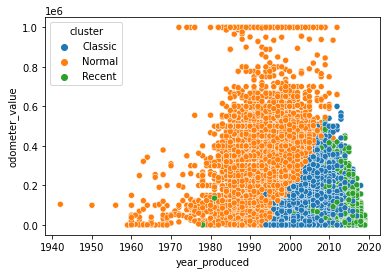

In [56]:
sns.scatterplot(data = df_new, x = 'year_produced', y = 'odometer_value', hue = 'cluster')

___
### Three-dimensional visualization of clusters

Finally, a three-dimensional graph will be presented with all the data separated by colors that represent each cluster. This way it is possible to have a more accurate idea of how the division was actually done by the algorithm.

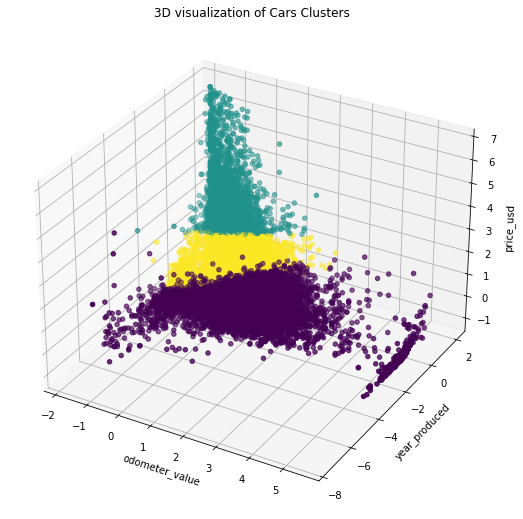

In [57]:
# Create a 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three features of the Cars dataset
ax.scatter(df_normalized[:,0],  # Odometer_value
           df_normalized[:,1],  # year_produced
           df_normalized[:,2],  # price_usd
           c=adj_clusters,      # Use cluster labels as color encoding
           cmap='viridis', 
           marker='o')

# Set labels according to the features we used
ax.set_xlabel('odometer_value')
ax.set_ylabel('year_produced')
ax.set_zlabel('price_usd')

# Title of the plot
ax.set_title('3D visualization of Cars Clusters')

# Show the plot
plt.show()

___
### **Conclusion of problem 1**

First of all, it can be stated that the execution of the K-Means clustering unsupervised learning method was easy and intuitive to use thanks to the great work carried out by the authors and collaborators of the scy-kit learn library. And for that same reason, here is a special thanks to this entity!

The main conclusion that can be drawn from this small practice is that the K-Means algorithm proves to be a simple, reliable and fast solution when it comes to identifying groups with similarities in a large group of data. The algorithm was able to divide the dataset of cars into viable or non-viable options when it comes to purchasing cars and could without a doubt become a good candidate for solving problems similar to this one but of greater complexity. Therefore, this practice allowed us to acquire some precious basic knowledge on this topic and could undoubtedly serve as a basis for other similar projects.

Regarding the results specifically, it can be concluded that K-Means made it possible to identify groups of cars that correspond to **choices of relatively recent cars with not very high mileage (cluster 1), choices of recent cars with fewer kilometers (cluster 2) and choices of older cars with more kilometers (cluster 3)**. In a real context, this identification would be crucial to **guide less experienced users to make the right purchase of a car**, for example on a car sales website.

----
## Unsupervised Learning - Problem 2

The second unsupervised learning problem involves identifying which **characteristics are inherent to the car based on a specific attribute**. In other words, the user intends to buy a car with a characteristic (for example, a gasoline car) and it is necessary to identify what attributes the car could have taking into account that characteristic (it could have a manual gearbox, be a sedan,... .).

For this, the so-called **association rules*** will be used, namely the **Apriori algorithm**.

**Association rules find patterns between different attributes of a dataset**. In other words, it finds the probability of the occurrence of an attribute taking into account the actual occurrence of another attribute. These algorithms are more oriented towards databases with transaction data, that is, occurrences. This in practical terms means that the dataset to be used must have **columns (attributes)** that occur or do not occur through the definition of **True or False**.

The **Apriori algorithm** finds frequent sets, and when these have occurrences lower than the established threshold, they are suppressed. This threshold is called **minimum support** and can be varied according to the intended application. There is some complexity at a theoretical level regarding this topic, so it is strongly recommended to read the following [article on medium](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c) and also this [practical solution](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/) presented with the mlxtend library.

**This problem will be divided into the following chapters:**

1. Importing the *machine learning* library

2. Data processing, selection and preparation

3. Pivot table implementation

4. Association rules with the Apriori algorithm

5. Result preview

___
### mlxtend library

For this second problem, an exclusive library for machine learning algorithms will be used. The name of the library is **[mlxtend](https://rasbt.github.io/mlxtend/)** and this choice is based on the simplicity of the API and the practicality of the library. There are many examples that make use of this same library and there is a lot of support from the documentation itself.

In particular, the section relating to **association rules** and the **Apriori algorithm** will be imported as these methods will be used.

The inclusion of this library requires prior installation of the **mlxtend** package using *PIP*:
* `pip install mlxtend`

In [59]:
pip install mlxtend

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Imports
from mlxtend.frequent_patterns import apriori, association_rules

___
### Choice, processing and preparation of data

For this problem, **data organization** is extremely important. Unlike the previous case, for association rules, **only the use of Boolean qualitative variables (True or False)** is allowed. However, it will not be necessary to discard numerical variables now as a method for including them will be discussed below.

The dataset is read again through a pandas data structure and the columns that will be used are selected. You can take advantage of those relevant Boolean variables right from the start, such as **"engine_has_gas", "has_warranty" and "is_exchangeable"**.

In [61]:
# Read the file and select desired columns
del df
df = pd.read_csv('cars.csv', usecols=['body_type', 'transmission', 'engine_fuel', 'engine_capacity', 'engine_has_gas', 'has_warranty', 'price_usd', 'is_exchangeable'])

# Copy other variables as they are
df['engine_has_gas'] = df['engine_has_gas']
df['has_warranty'] = df['has_warranty']
df['is_exchangeable'] = df['is_exchangeable']

Next we will deal with variables with only **two states**, as these can be easily mapped with **Boolean** according to the objective. Therefore, the variables **"transmission"**, **"engine_fuel"** and **"engine_capacity"** will be used, whereby:

* Using ***one-hot encoding***, it is possible to create a column for **manual gearboxes** and another for **automatic gearboxes**.
* Using ***one-hot encoding***, it is possible to create a column for cars with **gasoline fuel** and another for **diesel cars**.
* If the engine capacity (engine_capacity) **is greater than 2.5L**, the value will be **True** and if it is lower, it will be False.

Note that the last variable does not just have two states and is numeric, but it is still possible to map it to include the format for the association rules. This is a good way to introduce how other numeric variables will be included in the data structure below!

In [62]:
# Transform 'transmission'
df = pd.get_dummies(df, columns=['transmission'], prefix='transmission')

# Transform 'engine_fuel'
df = pd.get_dummies(df, columns=['engine_fuel'], prefix='engine_fuel')

# Transform 'engine_capacity' (True - >2.5)
df['engine_capacity'] = df['engine_capacity'].apply(lambda x: True if x > 2.5 else False)

To complete the data processing, two more very important numerical variables will be included but in a distributed manner. The way to include the **price of the car (*price_usd*)** and the **type of chassis (*body_type*)** was by dividing them into specific subcategories. That is, organize price groups within the price_usd variable and chassis type groups within the body_type variable.

* For prices, six categories were organized, where if the price is between specific values, the respective variable will have the value True and otherwise the value False.

* Regarding the type of chassis, only a comparison was made with each name on the list and columns related to each type were organized.

At the end, the table relating to the problem's data structure is presented to confirm compliance with the rules.

In [63]:
# Transform price ranges
df['price_0_1000'] = df['price_usd'].apply(lambda x: -1 <= x <= 1000)
df['price_1000_2500'] = df['price_usd'].apply(lambda x: 1000 <= x <= 2500)
df['price_2500_5000'] = df['price_usd'].apply(lambda x: 2500 <= x <= 5000)
df['price_5000_10000'] = df['price_usd'].apply(lambda x: 5000 <= x <= 10000)
df['price_10000_20000'] = df['price_usd'].apply(lambda x: 10000 <= x <= 20000)
df['price_>20000'] = df['engine_capacity'].apply(lambda x: True if x > 20000 else False)

# Transform body types
df = pd.get_dummies(df, columns=['body_type'], prefix='body_type')

# Drop the original column as it was adapted
df = df.drop(['price_usd'], axis=1)

# Display the first rows of the data frame
df.head()

,engine_has_gas,engine_capacity,has_warranty,is_exchangeable,transmission_automatic,transmission_mechanical,engine_fuel_diesel,engine_fuel_electric,engine_fuel_gas,engine_fuel_gasoline,...,body_type_hatchback,body_type_liftback,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van
0,False,False,False,False,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,False,True,False,True,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,False,False,False,True,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,False,True,False,True,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,False,False,False,True,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


___
### Pivot Table Implementation

To process the data, it will be necessary to create a table using the created data frame. As such, the so-called **Pivot Table** is created, which is made up of rows corresponding, in this case, to cars for sale and in the columns the various Boolean attributes that were discussed previously. To make the implementation of the table possible, the pandas "pivot_table" function was used and, in addition, a column was created with identifiers for each car for sale, as this was not included in the original dataset and a way of differentiate each transaction.

In [64]:
# Add an 'ID' column
df['ID'] = range(1, len(df) + 1)

# Create a pivot table using the 'ID' column as the index
pivot_table = pd.pivot_table(df, index=['ID'])

# Convert 0s and 1s to True and False
pivot_table = pivot_table.astype(bool)

# Display the resulting pivot table
pivot_table.head(10)

,body_type_cabriolet,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,...,has_warranty,is_exchangeable,price_0_1000,price_10000_20000,price_1000_2500,price_2500_5000,price_5000_10000,price_>20000,transmission_automatic,transmission_mechanical
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
3,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


___
### Association rules with the Apriori algorithm

Now comes the main part of the problem. **Frequent items** will be obtained here based on a minimum defined using the **Apriori algorithm**. Then, based on these items, the **association rules** will be generated. The result is a table that presents the *antecedents*, the *consequents* and a set of associated metrics.

A very low minimum support was defined so that the algorithm generates more associations and thus the user has more options to choose from and a null result is not presented.

In order to better understand the table, the **consequent** is the attribute that occurs after the occurrence of the **antecedent**. The most relevant metric for this problem will be *confidence*, which represents the **probability** of the consequent occurring knowing that the antecedent occurred.

As for the remaining metrics, here is the basic description:

* support - Measures the frequency of occurrences of the set of attributes in the dataset.

* lift - Measures the impact of the rule in a situation in which the antecedent and consequent are independent.

* leverage - Measures the difference between the frequency of the antecedent and the consequent in situations where they are together and when they are independent.

* conviction - Measures the possibility of the consequent occurring without the antecedent.

In [65]:
# Get the rules
min_support=0.01
freq_itemsets = apriori(pivot_table, min_support=min_support, use_colnames=True)    
rules = association_rules(freq_itemsets, metric="support", min_threshold=min_support)    
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(body_type_coupe),(engine_fuel_gasoline),0.016921,0.624562,0.015702,0.927914,1.485704,1.0,0.005133,5.208203,0.332545,0.025091,0.807995,0.476527
1,(engine_fuel_gasoline),(body_type_coupe),0.624562,0.016921,0.015702,0.025140,1.485704,1.0,0.005133,1.008431,0.870765,0.025091,0.008360,0.476527
2,(body_type_hatchback),(engine_fuel_diesel),0.198386,0.334069,0.040772,0.205521,0.615205,1.0,-0.025502,0.838198,-0.438287,0.082924,-0.193035,0.163784
3,(engine_fuel_diesel),(body_type_hatchback),0.334069,0.198386,0.040772,0.122048,0.615205,1.0,-0.025502,0.913050,-0.484336,0.082924,-0.095230,0.163784
4,(body_type_hatchback),(engine_fuel_gasoline),0.198386,0.624562,0.152397,0.768184,1.229957,1.0,0.028493,1.619553,0.233233,0.227271,0.382546,0.506095
5,(engine_fuel_gasoline),(body_type_hatchback),0.624562,0.198386,0.152397,0.244006,1.229957,1.0,0.028493,1.060345,0.497987,0.227271,0.056910,0.506095
6,(body_type_hatchback),(is_exchangeable),0.198386,0.352599,0.062755,0.316327,0.897128,1.0,-0.007196,0.946944,-0.125145,0.128535,-0.056028,0.247152
7,(is_exchangeable),(body_type_hatchback),0.352599,0.198386,0.062755,0.177977,0.897128,1.0,-0.007196,0.975173,-0.150470,0.128535,-0.025459,0.247152
8,(body_type_hatchback),(price_0_1000),0.198386,0.104643,0.035712,0.180010,1.720234,1.0,0.014952,1.091913,0.522301,0.133592,0.084176,0.260640
9,(price_0_1000),(body_type_hatchback),0.104643,0.198386,0.035712,0.341270,1.720234,1.0,0.014952,1.216908,0.467617,0.133592,0.178245,0.260640


___
### Result preview

The table with the association rules was obtained, however, its interpretation is not so straightforward and, therefore, we now intend to make reading the data easier for the user.

What is intended here is that given a user input (an attribute), the program returns a set of outputs (attributes) and their probabilities. For example, given that the user wants a coupe-type car, the program should return the set of attributes and their relative probability of occurring together with the initial chosen attribute.

To begin, the values of the variables were mapped in order to construct more concrete sentences. Attributing these maps will greatly help the user to understand the output.

In [66]:
# Mapping the specific characteristics to give better context for the user
transmission_mapping = {
    'transmission_mechanical': 'manual transmission',
    'transmission_automatic': 'automatic transmission'
}

exchangeable_mapping = {
    True: 'exchangeable',
    False: 'unexchangeable'
}

engine_fuel_mapping = {
    'engine_fuel_gasoline': 'gasoline fuel',
    'engine_fuel_diesel': 'diesel fuel',
    'engine_fuel_gas': 'gas fuel',
    'engine_fuel_electric': 'a electric batery'
}

engine_capacity_mapping = {
    True: 'engine capacity > 2.5',
    False: 'engine capacity <= 2.5'
}

body_type_mapping = {
    'body_type_universal': 'universal body type',
    'body_type_suv': 'SUV body type',
    'body_type_sedan': 'sedan body type',
    'body_type_hatchback': 'hatchback body type',
    'body_type_liftback': 'liftback body type',
    'body_type_minivan': 'minivan body type',
    'body_type_minibus': 'minibus body type',
    'body_type_van': 'van body type',
    'body_type_pickup': 'pickup body type',
    'body_type_coupe': 'coupe body type',
    'body_type_cabriolet': 'cabriolet body type',
    'body_type_limousine': 'limousine body type'
}

price_mapping = {
    'price_0_1000': 'price between 0 and 1000 USD',
    'price_1000_2500': 'price between 1000 and 2500 USD',
    'price_2500_5000': 'price between 2500 and 5000 USD',
    'price_5000_10000': 'price between 5000 and 10000 USD',
    'price_10000_20000': 'price between 10000 and 20000 USD',
    'price_>20000': 'price higher than 20000 USD'
}

After mapping, functions were created that receive user input, traverse the rules table looking for the chosen antecedent and return the elements with the highest probability of occurring.

In [67]:
# Function that displays on the output the characteristics that are likely to be present on a vehicle based on a sigle chosen characteristic
def display_recommendations(associated_characteristics, associated_probabilities, condition_col):

    # Checks the chosen characteristic and adds a context text arround it
    if condition_col == 'transmission':
        print(f'If you want a car with a {transmission_mapping[condition_col]}:')
    elif condition_col == 'is_exchangeable':
        print(f'If you want a car that is {exchangeable_mapping[True]}:')
    elif condition_col == 'engine_fuel':
        print(f'If you want a car with {engine_fuel_mapping[condition_col]}:')
    elif condition_col == 'engine_capacity':
        print(f'If you want a car with {engine_capacity_mapping[True]} L:')
    elif condition_col in body_type_mapping:
        print(f'If you want a {body_type_mapping[condition_col]}:')
    elif condition_col in price_mapping:
        print(f'If you want a car with a {price_mapping[condition_col]}:')
    else:
        print(f'If you want a car with this characteristic: {condition_col}')

    # Goes trough the set that contains the associated characteristics and respective probabilities and adds contextual text arround it
    for char, prob in zip(associated_characteristics, associated_probabilities):
             
        if char in transmission_mapping:
            print(f'-it will have a {transmission_mapping[char]} with {prob * 100:.2f}% probability.')
        elif char == 'is_exchangeable':
            print(f'-it will be {exchangeable_mapping[True]} with {prob * 100:.2f}% probability.')
        elif char in engine_fuel_mapping:
            print(f'-it will have {engine_fuel_mapping[char]} with {prob * 100:.2f}% probability.')
        elif char == 'engine_capacity':
            print(f'-it will have {engine_capacity_mapping[True]}L with {prob * 100:.2f}% probability.')
        elif char in body_type_mapping:
            print(f'-it will be a {body_type_mapping[char]} with {prob * 100:.2f}% probability.')
        elif char in price_mapping:
            print(f'-it will have a {price_mapping[char]} with {prob * 100:.2f}% probability.')
        else:
            print(f'-Unknown characteristic: {char} with {prob * 100:.2f}% probability.')

# Function to get the associated characteristics based on a condition
def get_associated_characteristics(rules, condition_col, rec_count):
    associated_info = recommend_items(rules, condition_col, rec_count)
    
    if associated_info:
        associated_characteristics, associated_probabilities = zip(*associated_info)
        print(f'\nTarget Characteristic: {condition_col} = True')
        print(f'Associated Characteristics: {associated_characteristics}')
        print(f'Associated Probabilities: {associated_probabilities}')

        print(" ")
        # Call the display_recommendations function
        display_recommendations(associated_characteristics, associated_probabilities, condition_col)
        
    else:
        print(f'\nNo associated characteristics found for the specified characteristic.')

# Function for simulating the recommendation process
def recommend_items(rules_df, condition_col, rec_count):
    # Convert the condition_value to frozenset for comparison
    condition_set = frozenset([condition_col])

    filtered_rules = rules_df[rules_df['antecedents'].apply(lambda x: condition_set.issubset(x))]

    if not filtered_rules.empty:
        sorted_rules = filtered_rules.sort_values('confidence', ascending=False)

        associated_characteristics = set()
        associated_probabilities = []

        for _, row in sorted_rules.iterrows():
            consequents = list(row['consequents'])
            confidence = row['confidence']

            # Extract the characteristic and add to the set
            for consequent in consequents:
                associated_characteristics.add(consequent)
                associated_probabilities.append(confidence)

                # Break if we reach the desired number of recommendations
                if len(associated_characteristics) >= rec_count:
                    # Convert set to list for consistent output
                    return list(zip(list(associated_characteristics), associated_probabilities))

        # Convert set to list for consistent output
        return list(zip(list(associated_characteristics), associated_probabilities))
    else:
        return []

Below are two brief examples of using the function. As a first parameter, the table of association rules is defined, then the desired characteristic for the car you want to buy is indicated and finally the number of attributes that the function must provide for the user to choose from is indicated.

In [68]:
# Example usage
get_associated_characteristics(rules=rules, condition_col='engine_capacity', rec_count=3)


Target Characteristic: engine_capacity = True
Associated Characteristics: ('body_type_suv', 'engine_fuel_gasoline', 'transmission_automatic')
Associated Probabilities: (0.9833333333333333, 0.9676258992805756, 0.9636752136752136)
 
If you want a car with engine capacity > 2.5 L:
-it will be a SUV body type with 98.33% probability.
-it will have gasoline fuel with 96.76% probability.
-it will have a automatic transmission with 96.37% probability.


In [69]:
get_associated_characteristics(rules, 'body_type_suv', 4)


Target Characteristic: body_type_suv = True
Associated Characteristics: ('engine_capacity', 'engine_fuel_gasoline', 'transmission_automatic', 'price_10000_20000')
Associated Probabilities: (0.9833333333333333, 0.9676258992805756, 0.9636752136752136, 0.9548218940052128)
 
If you want a SUV body type:
-it will have engine capacity > 2.5L with 98.33% probability.
-it will have gasoline fuel with 96.76% probability.
-it will have a automatic transmission with 96.37% probability.
-it will have a price between 10000 and 20000 USD with 95.48% probability.


___
## Conclusion of problem 2

It can be concluded for this problem that the use of association rules and the Apriori algorithm is quite easy and intuitive. Data preparation turns out to be the most demanding phase of this problem and therefore it is very important to ensure that the data is well organized and adapted to the problem.

The way of obtaining the results appears to be a very interesting way of providing the necessary information. A better interface could easily utilize these functions and adapt a more visually pleasing result.

In general, this problem allowed us to deepen our knowledge about this part of unsupervised learning and once again this practice appears to be a very solid basis for future projects related to machine learning.

___
## Completion of unsupervised learning

To conclude this topic, unsupervised machine learning is a very interesting topic with well-defined real applications. This variant of *machine learning* is an approach that is not as demanding as, for example, neural networks, but can also establish relationships between data automatically.

Using these algorithms makes it possible to find patterns in data that would otherwise be undetectable or very difficult to identify in another way. Essentially being programs, they can run on different machines and maintain a real-time update of databases that are obviously always changing.

Imagine, in the context of the database that was used, a car sales website that intends to maintain consumer aids such as those presented in this simple practice. It is possible to keep these algorithms running on servers for similar databases that update every moment.

The application presented allowed us to deepen our knowledge on this topic and will, without a doubt, be an added value for future projects. These algorithms could prove to be very useful in data processing or in the construction of complex databases. The scale of the problem can be easily increased or differentiated and there will not be much difficulty in applying the association rules and clustering algorithms.